In [1]:
%run C:/Users/HSS/dd.py
print('done')

done


In [2]:
from scipy import stats

In [19]:
rv = stats.norm(loc = 0, scale = 0.1)
xx = np.linspace(-1,1,1000)
pdf = rv.pdf(xx)

## pdf의 높이와 cdf의 높이
- pdf의 높이는 확률이 아니다. 그저 cdf의 기울기만을 의미한다.
- pdf의 넓이(정적분값)이 확률, cdf의 높이가 확률이다.
- 그 증거로 max(pdf) = 3.989가 나왔다. 확률이라면 나올 수 없는 수치이다.

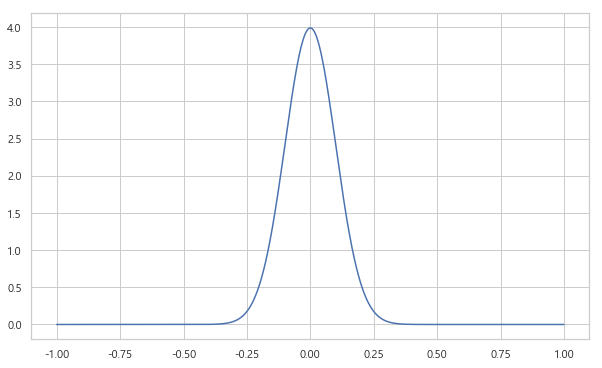

In [21]:
plt.figure(figsize = (10,6))
plt.plot(xx,pdf)
plt.xlim(-0.5,0.5)
plt.title('정규분포 그래프')
plt.axvline(rv.mean(), linestyle = ':', color = 'r', linewidth = 3.5)
plt.axhline(max(pdf), linestyle = '--', color = 'g')
plt.ylabel('$p(x)$')
plt.xlabel('x')
plt.show()

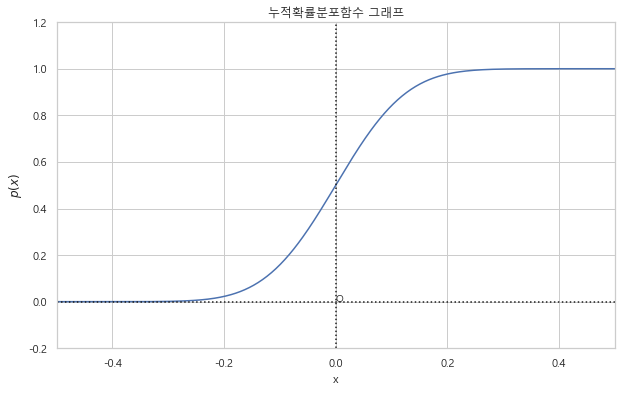

In [5]:
cdf = rv.cdf(xx)
plt.figure(figsize = (10,6))

plt.plot(xx,cdf)
plt.xlim(-0.5,0.5)
plt.ylim(-0.2, 1.2)
plt.title('누적확률분포함수 그래프')
plt.axhline(0, color = 'k', linestyle = ':')
plt.axvline(0, color = 'k', linestyle = ':')
plt.annotate('O',(0,0))
plt.ylabel('$p(x)$')
plt.xlabel('x')
plt.show()

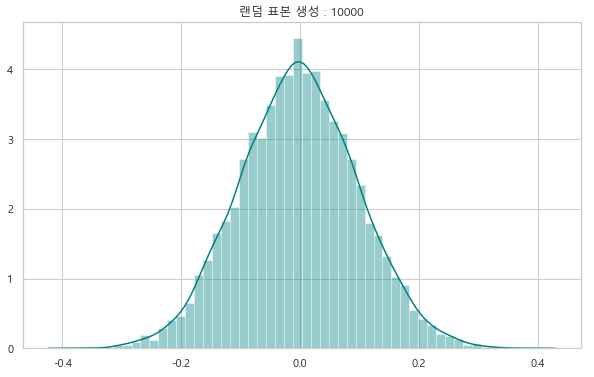

In [6]:
xx = rv.rvs(10000,0)
plt.figure(figsize = (10,6))
sns.distplot(xx, color = 'teal')
plt.title('랜덤 표본 생성 : 10000')
plt.show()

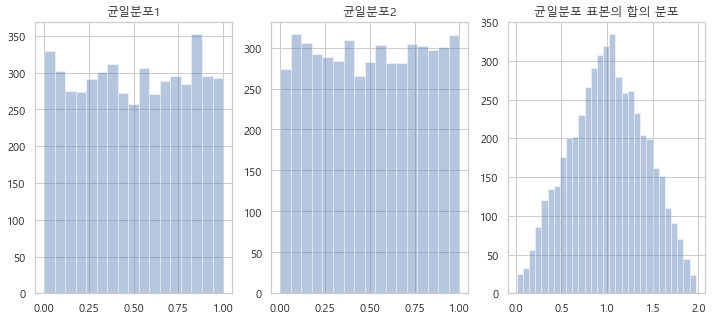

In [7]:
rv1 = stats.uniform()
rv2 = stats.uniform()
N = 5000
x_1, x_2 = rv1.rvs(N), rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize = (12,5))


plt.subplot(131)
sns.distplot(x_1, kde = False)
plt.title('균일분포1')


plt.subplot(132)
sns.distplot(x_2, kde = False)
plt.title('균일분포2')


plt.subplot(133)
sns.distplot(x_3, kde = False)
plt.title('균일분포 표본의 합의 분포')

plt.show()


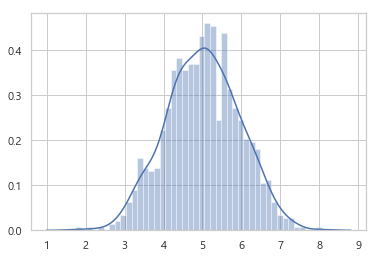

In [8]:
x = stats.uniform.rvs(size = (10,1000))
#10개짜리 1000번 합 : axis = 0 나와야함
s = x.sum(axis = 0)
bins = np.linspace(min(s),max(s),45)
sns.distplot(s, bins = bins)
plt.show()

In [9]:
np.random.seed(0)
rv = stats.norm(1,2)
x = rv.rvs(1000)

print('표본평균: {} 과 비편향 표본분산: {}'.format(np.mean(x), x.var(ddof=1)))

표본평균: 0.9094865850196092 과 비편향 표본분산: 3.9008386639125296


### Scipy 활용

####  정규분포

In [17]:
rv = stats.norm(loc = 0, scale = 0.1)
xx = np.linspace(-1,1,1000)
pdf = rv.pdf(xx)

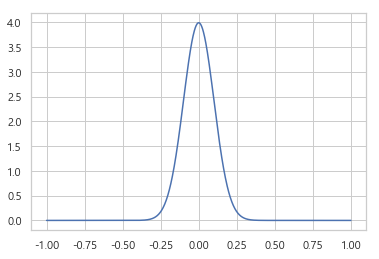

In [23]:
plt.plot(xx,pdf)
plt.show()

#### 베르누이

In [25]:
mu = 0.6
rv = stats.bernoulli(0.4)


In [57]:
xx = [0,1]
rv.pmf(xx)

array([0.6, 0.4])

In [37]:
x = rv.rvs(100)
x.sum()

43

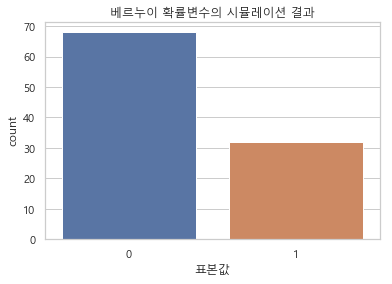

In [36]:
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [55]:
y = np.bincount(x, minlength=2)/len(x)
y

array([0.57, 0.43])

In [64]:
df = pd.DataFrame(
{'이론': rv.pmf(xx),
 '시뮬레이션': y    
})
df

,시뮬레이션,이론
0,0.57,0.6
1,0.43,0.4


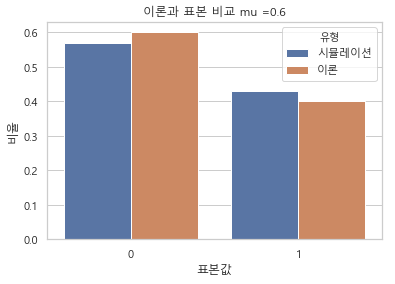

In [83]:
df2 = df.stack().reset_index()
df2.columns = ['표본값', '유형', '비율']
plt.title('이론과 표본 비교 mu =0.6')
sns.barplot(x = '표본값', y = '비율', hue = '유형', data = df2)
plt.show()

### 모수가 0.5, 0.9일 때 표본과 확률질량함수와 비교한 바플롯을 그리고, 기대값과 분산을 구하라. 표본이 10인 경우와 1000인 경우에 대해 각각 계산하라.

In [100]:
## 모수 0.5인 베르누이분포 객체 생성
rv = stats.bernoulli(0.5)
xx = [0,1]
pmf  = rv.pmf(xx)
rvs10 = rv.rvs(10)
rvs1000 = rv.rvs(1000)

x10, x1000 = np.bincount(rvs10)/ float(len(rvs10)), np.bincount(rvs1000)/float(len(rvs1000))

df10 = pd.DataFrame({
    '확률': pmf,
    '표본': x10    
})

df_10 = df10.stack().reset_index()
df_10.columns = ['표본값', '유형', '비율']
df_10

,표본값,유형,비율
0,0,표본,0.5
1,0,확률,0.5
2,1,표본,0.5
3,1,확률,0.5


In [101]:
x10

array([0.5, 0.5])